<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

Prediction of House Price Using Linear Regression

# Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np


%matplotlib inline

## Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "C:/Users/user/Documents/IOD_data_MAIN/DATA/Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

In [3]:
# Data Types
# Hint: Look into the columns zip, sale_date & beds
house.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [4]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
house.shape

(985, 12)

In [6]:
house.size

11820

In [7]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
# sale_date column is wrong, there might be duplicated zip number if u check index 2,3.
# maybe the beds number is wrong and doesn't tally with the price 

In [10]:
# Feature Engineering


In [11]:
#house.sale_date = pd.to_datetime(house.sale_date) 

In [12]:
# Perform EDA
house.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [13]:
house.duplicated().sum()

3

In [14]:
#to get duplicated row info 
d_house = house.duplicated()
duplicates = house[d_house]
print(duplicates)

                street            city    zip state  beds  baths  sq__ft  \
342      4734 14TH AVE      SACRAMENTO  95820    CA     2      1     834   
404     8306 CURLEW CT  CITRUS HEIGHTS  95621    CA     4      2    1280   
601  7 CRYSTALWOOD CIR         LINCOLN  95648    CA     0      0       0   

            type                     sale_date   price   latitude   longitude  
342  Residential  Mon May 19 00:00:00 EDT 2008   68000  38.539447 -121.450858  
404  Residential  Mon May 19 00:00:00 EDT 2008  167293  38.715781 -121.298519  
601  Residential  Mon May 19 00:00:00 EDT 2008    4897  38.885962 -121.289436  


In [15]:
house.drop_duplicates()


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [16]:
#bed & sq_ft = 0 
bed_0 = house["beds"] == 0
print(house.loc[bed_0])


                       street             city    zip state  beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA     0      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA     0      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0      0   
..                        ...              ...    ...   ...   ...    ...   
901  1530 TOPANGA LN Unit 204          LINCOLN  95648    CA     0      0   
917            501 POPLAR AVE  WEST SACRAMENTO  95691    CA     0      0   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA     0      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA     0      0   
970             3557 SODA WAY       SACRAMENTO  95834    CA     0      0   

     sq__ft         type                     sale_date   price   latitude  \
73        

In [17]:
bed_mean = house['beds'].mean(axis = 0)
print(bed_mean)

2.9116751269035532


In [18]:
#Add the mean value into bed_0
house["beds"].replace({0: bed_mean}, inplace=True)
print(house.loc[bed_0])

                       street             city    zip state      beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA  2.911675      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA  2.911675      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA  2.911675      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA  2.911675      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA  2.911675      0   
..                        ...              ...    ...   ...       ...    ...   
901  1530 TOPANGA LN Unit 204          LINCOLN  95648    CA  2.911675      0   
917            501 POPLAR AVE  WEST SACRAMENTO  95691    CA  2.911675      0   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA  2.911675      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA  2.911675      0   
970             3557 SODA WAY       SACRAMENTO  95834    CA  2.911675      0   

     sq__ft         type               

In [19]:
sq_ft_0 = house["sq__ft"] == 0
print(house.loc[sq_ft_0])
#print(sq_ft_0)

                       street             city    zip state      beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA  2.911675      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA  2.911675      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA  2.911675      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA  2.911675      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA  2.911675      0   
..                        ...              ...    ...   ...       ...    ...   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA  2.911675      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA  2.911675      0   
966          9197 CORTINA CIR        ROSEVILLE  95678    CA  3.000000      2   
970             3557 SODA WAY       SACRAMENTO  95834    CA  2.911675      0   
973      2181 WINTERHAVEN CIR     CAMERON PARK  95682    CA  3.000000      2   

     sq__ft         type               

In [20]:
house_sq__ft_mean = house['sq__ft'].mean(axis = 0)
print(house_sq__ft_mean)

1314.9167512690356


In [21]:
help(pd.DataFrame.replace)

Help on function replace in module pandas.core.frame:

replace(self, to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
    Replace values given in `to_replace` with `value`.
    
    Values of the DataFrame are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_replace` will be replaced with
              `value`
    
        * list of str, regex, or numeric:
    
            - First, if `to_replace

In [22]:
#add mean value into sq ft 
house["sq__ft"].replace({0: house_sq__ft_mean}, inplace=True)
print(house.loc[sq_ft_0])

                       street             city    zip state      beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA  2.911675      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA  2.911675      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA  2.911675      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA  2.911675      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA  2.911675      0   
..                        ...              ...    ...   ...       ...    ...   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA  2.911675      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA  2.911675      0   
966          9197 CORTINA CIR        ROSEVILLE  95678    CA  3.000000      2   
970             3557 SODA WAY       SACRAMENTO  95834    CA  2.911675      0   
973      2181 WINTERHAVEN CIR     CAMERON PARK  95682    CA  3.000000      2   

          sq__ft         type          

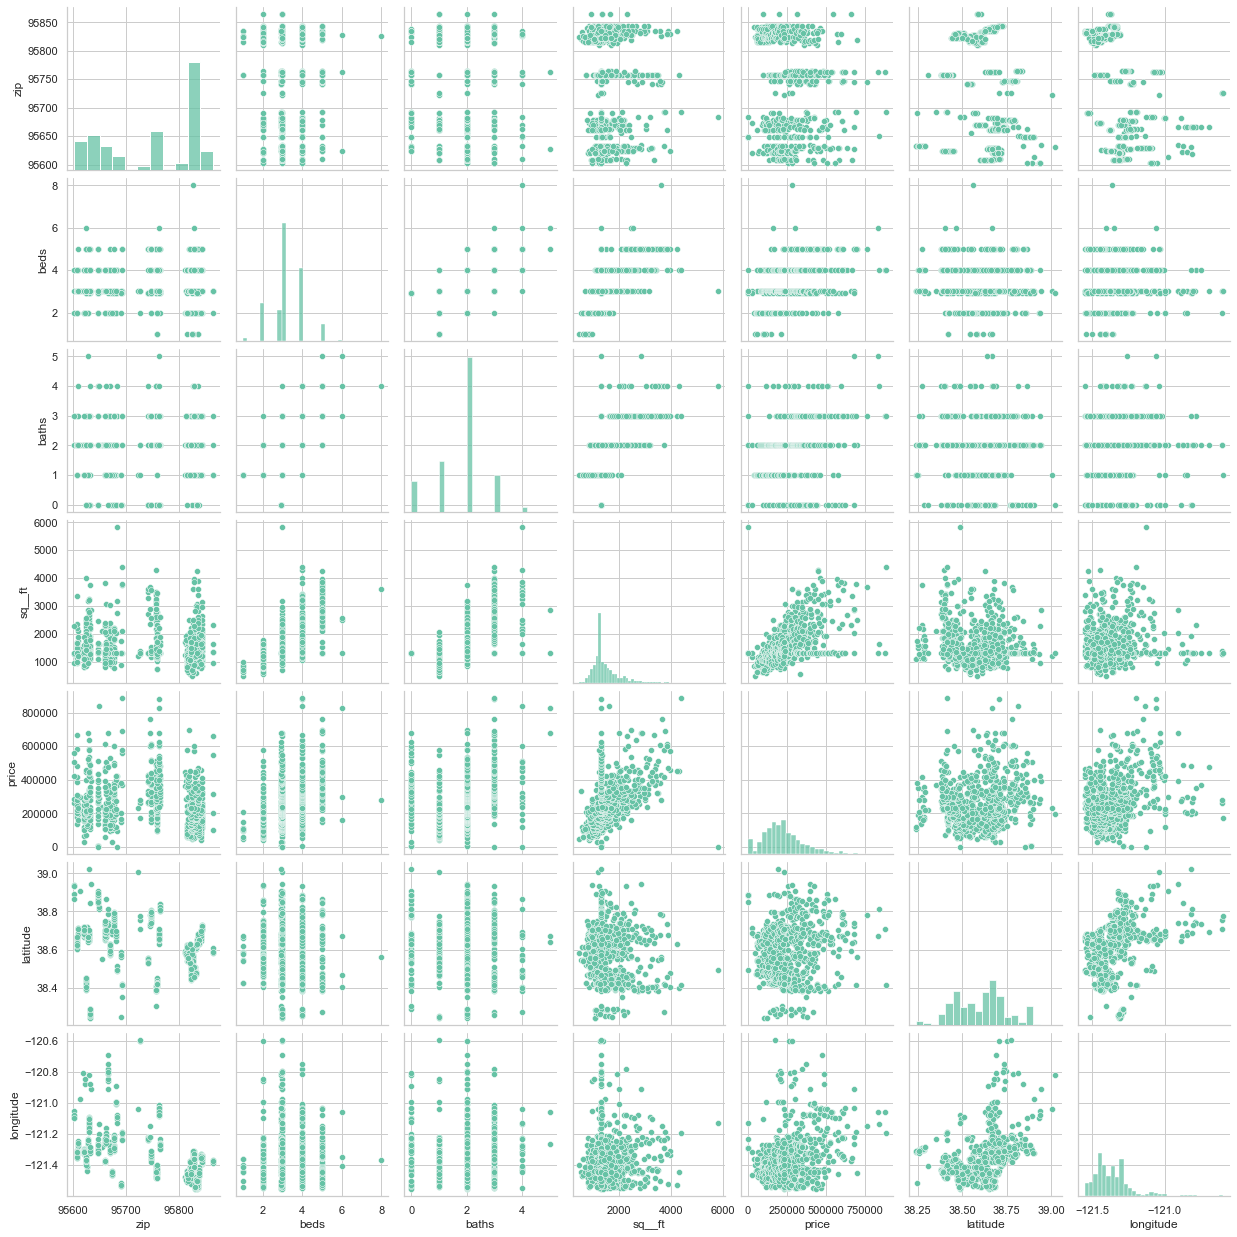

In [23]:
import seaborn as sns
sns.set_theme(style = "whitegrid", palette='Set2')
sns.pairplot(house)

# Predict Price

We are going to predict `price` from available information.

## What is the Target Variable? Why?

In [24]:
# ANSWER Price


## List all possible variables which might be Predictor variable.

In [25]:
# ANSWER bed and sq_ft 

## Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [26]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [27]:
house.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.038355,0.069165,-0.043852,-0.093353,-0.290389,-0.539904
beds,-0.038355,1.000000,0.563548,0.650869,0.412636,-0.093180,0.054626
baths,0.069165,0.563548,1.000000,0.562171,0.416208,-0.235792,0.016582
sq__ft,-0.043852,0.650869,0.562171,1.000000,0.525367,-0.159076,0.044055
price,-0.093353,0.412636,0.416208,0.525367,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.093180,-0.235792,-0.159076,-0.039573,1.000000,0.387925
longitude,-0.539904,0.054626,0.016582,0.044055,0.284485,0.387925,1.000000


<AxesSubplot:>

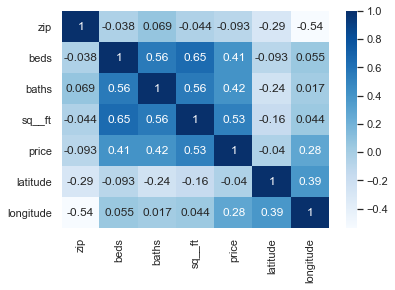

In [28]:
# ANSWER 
sns.heatmap(house.corr(),cmap='Blues', annot=True)

## What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [29]:
# ANSWER
house_price_median = house['price'].median()
print(house_price_median)

213750.0


## Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [30]:
# ANSWER This will change the negative value to positive. abs = absolute value 
help(abs)

Help on built-in function abs in module builtins:

abs(x, /)
    Return the absolute value of the argument.



In [31]:
actual_value = house['price']

abs(actual_value - house_price_median)

0      154528.0
1      145538.0
2      144870.0
3      144443.0
4      131850.0
         ...   
980     18675.0
981     20250.0
982     21250.0
983     21551.0
984     21988.0
Name: price, Length: 985, dtype: float64

## Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

$$\hat{y} = \beta_0 + \beta_1 x$$

where

> $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

### Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [32]:
# ANSWER
X = house['sq__ft']
Y = house['price']



### Calculate beta_1

$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [33]:
Y_mean = Y.mean()
X_mean = X.mean()
print(X_mean, Y_mean)

1543.1916390527942 234144.26395939087


In [34]:
def Cal_beta_1(X,Y):
   
    return np.sum(((Y - Y_mean) * (X - X_mean)) / np.sum((X - X_mean) ** 2))

print(Cal_beta_1(X,Y))

118.69712897275272


In [35]:
beta1 = Cal_beta_1(X,Y)
print(beta1)

118.69712897275272


In [36]:
# ANSWER
    
#beta_1 = (((Y - Y_mean) * (X - X_mean)).sum() / ((X - X_mean) ** 2)).sum() 
#print(beta_1)

### Calculate beta_0

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [37]:
# ANSWER
def Cal_beta_0(X,Y):
    return np.sum((Y_mean - (beta1 * X_mean)))


In [38]:
print(Cal_beta_0(X,Y))
beta0 = Cal_beta_0(X,Y)

50971.846949067694


In [39]:
#beta_0 = ( Y_mean - beta_1 * X_mean)
#print(beta_0)

### Find Yhat (Predicted Value Using Beta 0 and Beta 1)

$$\hat{y} = \beta_0 + \beta_1 x$$

In [40]:
#def yhat_eg():
#    return (beta0 + (beta1 * X))

#yhat_res_eg = yhat_eg()
#print(yhat_res_eg)

In [62]:
# ANSWER equation - 𝑦̂ =𝛽0+𝛽1𝑥 Answer suppose to be in array form.
def yhat():
    return (beta0 + (beta1 * X))

yhat_res = yhat()
print(yhat_res)

0      150202.646770
1      189491.396460
2      145454.761611
3      152101.800834
4      145573.458740
           ...      
980    321601.301007
981    226287.506442
982    195307.555780
983    250976.509268
984    212637.336610
Name: sq__ft, Length: 985, dtype: float64


### Find Residuals

$$ \text{residual}_i = y_i - \hat{y}_i$$

In [42]:
# ANSWER
def residual():
    
    return abs(Y - yhat_res)


res_result = residual()
print(res_result)

0       90980.646770
1      121279.396460
2       76574.761611
3       82794.800834
4       63673.458740
           ...      
980     89176.301007
981      7712.493558
982     39692.444220
983     15675.509268
984     23100.663390
Length: 985, dtype: float64


### Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

$$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

$$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [43]:
# ANSWER
def calculate_ss_total(Y):
    ss_tot = np.sum(((Y-Y_mean)**2))
    return ss_tot
print(calculate_ss_total(Y))

18838783738865.37


In [44]:
def calculate_ss_res(yhat_res):
    ss_res = np.sum(((Y-yhat_res)**2))
    return ss_res

print(calculate_ss_res(yhat_res))

13639088323551.418


In [45]:
def calculate_r2_square():
    r2_square = 1 - (calculate_ss_res(yhat_res)/calculate_ss_total(Y))
    return r2_square

print(calculate_r2_square())

0.2760101441467644


### [BONUS] Draw Plot of Predicted Line

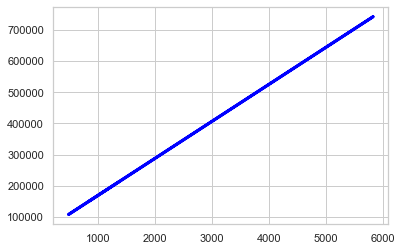

In [46]:
# ANSWER
from matplotlib import pyplot as plt


plt.plot(X, yhat_res, color='blue', linewidth=3 )

### [BONUS] Draw Plot of Predicted Line With Residuals

Text(0, 0.5, 'Price')

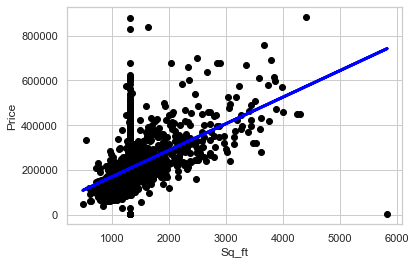

In [47]:
plt.scatter(X,Y, color ='black')
plt.plot(X, yhat_res, color='blue', linewidth=3 )
plt.xlabel('Sq_ft')
plt.ylabel('Price')

### Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      Parameters
 |      ----------
 |      fig : `matplotlib.figure.Figure`
 |      
 |      *args : tuple (*nrows*, *ncols*, *index*) or int
 |          The array of subplots in the figure has dimensions ``(nrows,
 |          ncols)``, and *index* is the index of the subplot being created.
 |          *index* starts at 1 in the upper left corner and inc

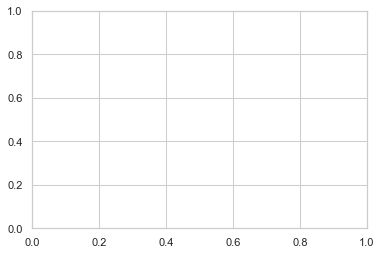

In [48]:
help(plt.gca())

In [58]:
sq_ft_1204 = house["sq__ft"] == 1204

print(house.loc[sq_ft_1204])

               street        city    zip state  beds  baths  sq__ft  \
409     332 PALIN AVE        GALT  95632    CA   3.0      2  1204.0   
930  1140 EDMONTON DR  SACRAMENTO  95833    CA   3.0      2  1204.0   

            type                     sale_date   price   latitude   longitude  
409  Residential  Mon May 19 00:00:00 EDT 2008  174000  38.260467 -121.302636  
930  Residential  Thu May 15 00:00:00 EDT 2008  174250  38.624570 -121.486913  


In [63]:
#yhat_res is the predicted prices so i use loc to get the 
print(yhat_res.loc[930])


193883.190232262


In [56]:
sq_ft = 1204
def yhat(sq_ft):
    return (beta0 + (beta1 * sq_ft))

yhat_res = yhat(sq_ft)
print(yhat_res)

193883.190232262


In [50]:
#predict_price_graph, = plt.plot(X, yhat_res, color='blue', linewidth=3 )
#line = plt.gca().get_lines()
#yd = line.get_ydata()

#predict_price = predict_price_graph.get_ydata(1204)
#print(predict_price)
#plt.xlabel('Sq_ft')
#plt.ylabel('Price')


## Find Coefficient and Intercept using Linear SKLearn Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

In [ ]:
#Find a way to change the data shape
#X_reshape = np.reshape(house['sq__ft'], -1,1)

In [ ]:
house[['price']].shape

In [64]:
# ANSWER
from sklearn.linear_model import LinearRegression
X = house[['sq__ft']]
Y = house['price']

reg = LinearRegression().fit(X, Y)
reg.coef_

array([118.69712897])

In [65]:
reg.intercept_

50971.84694906729

### Find R Score

In [66]:
# ANSWER


reg.score(X,Y)

0.2760101441467644

# Splitting Data

In [67]:
# ANSWER
from sklearn.model_selection import train_test_split



## Create training and testing subsets

Hint: Using `train_test_split` Library

In [68]:
# ANSWER
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Check Shape, Sample of Test Train Data

In [69]:
# ANSWER
x_train.shape

(788, 1)

In [70]:
x_test.shape

(197, 1)

In [71]:
y_train.shape

(788,)

In [72]:
y_test.shape

(197,)

## Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [73]:
# ANSWER
#X_train = x_train['sq__ft']
#Y_train = y_train['price']

reg_train = LinearRegression().fit(x_train, y_train)
print(reg_train.coef_)
print(reg_train.intercept_)
print(reg_train.score(x_train,y_train))

[115.42616329]
55739.647275979485
0.2581237810697562


In [74]:
reg_test = LinearRegression().fit(x_test, y_test)
print(reg_test.coef_)
print(reg_test.intercept_)
print(reg_test.score(x_test,y_test))

[129.98184327]
34266.99910500122
0.34391259379674877


## Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

What is the predicted value of that house?

In [76]:
# ANSWER\
sqft = [[1204]]
reg.predict(sqft)

array([193883.19023226])

## Find the error

In [78]:
# ANSWER

from sklearn.metrics import mean_squared_error

y_predicted = reg.predict(x_test)
rms = mean_squared_error(y_test, y_predicted, squared=False)
rms

116345.1351573506